In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
def split_period(date):
    if (date.month==2 and date.day>=21) or (date.month==3 and date.day<=15):
        return '확산기'
    elif (date.month==3 and date.day>=22) or (date.month==4) or (date.month==5 and date.day<=5):
        return '완화기'
    elif (date.month==5 and date.day>=6):
        return '회복기'
    else:
        return 'F' # 이 시기는 고려하지 않음

In [3]:
def groupby_ratio(df, groupby_col, agg_col, date_col, year_col, period_col):
    df_group = df.groupby([date_col, year_col, period_col, groupby_col])[[agg_col]].sum().reset_index() # 일별 합
    df_group = df_group.groupby([year_col, period_col, groupby_col])[[agg_col]].mean().reset_index() # 구간 별 평균
    df_group_2019 = df_group.query('YEAR==2019') # 2019년
    df_group_2020 = df_group.query('YEAR==2020') # 2020년
    
    df_group = pd.merge(df_group_2019, df_group_2020, on=[period_col, groupby_col], suffixes=['_2019', '_2020'])
    df_group[f'{agg_col}_RATIO'] = df_group[f'{agg_col}_2020'] / df_group[f'{agg_col}_2019'] # 2019년 대비 2020년
    df_group = df_group.drop(['YEAR_2019', 'YEAR_2020', f'{agg_col}_2019', f'{agg_col}_2020'], axis=1)
    
    df_ratio = pd.pivot_table(index=groupby_col, columns=period_col, values=f'{agg_col}_RATIO', data=df_group)[['확산기', '완화기', '회복기']]
    print(f"{groupby_col}별 2019년 대비 2020년 {agg_col}")
    display(df_ratio)
    return df_ratio

# 기간별 작년 대비 올해 비율 확인

- 확산기간 : 2월 21일 - 3월 15일
- 완화기간 : 3월 22일 - 5월 5일
- 회복기간 : 5월 6일 이후

## CARD 시기별

In [4]:
card = pd.read_csv("../data/original_data/processed_data/CARD_SPENDING_RESIDENT_KOR.csv")

In [5]:
card['STD_DD'] = pd.to_datetime(card['STD_DD'], format='%Y%m%d')
card['PERIOD'] = card['STD_DD'].map(split_period)
card = card.query('PERIOD != "F"')

### 구별 카드결제 횟수/금액

In [6]:
card_gu_amt_ratio = groupby_ratio(card, 'GU_CD', 'USE_AMT', 'STD_DD', 'YEAR', 'PERIOD')
card_gu_cnt_ratio = groupby_ratio(card, 'GU_CD', 'USE_CNT', 'STD_DD', 'YEAR', 'PERIOD')

GU_CD별 2019년 대비 2020년 USE_AMT


PERIOD,확산기,완화기,회복기
GU_CD,,,
대구 수성구,0.605485,0.738370,0.953422
대구 중구,0.384407,0.632142,0.889688
서울 노원구,0.811727,0.862516,1.066516
서울 중구,0.695559,0.784514,0.947853


GU_CD별 2019년 대비 2020년 USE_CNT


PERIOD,확산기,완화기,회복기
GU_CD,,,
대구 수성구,0.607966,0.721993,0.894169
대구 중구,0.342470,0.581135,0.802606
서울 노원구,0.826078,0.863473,0.993953
서울 중구,0.745193,0.783825,0.881397


### 품목별 카드결제 횟수/금액

In [7]:
card_cat_amt_ratio = groupby_ratio(card, 'MCT_CAT_CD', 'USE_AMT', 'STD_DD', 'YEAR', 'PERIOD')
card_cat_cnt_ratio = groupby_ratio(card, 'MCT_CAT_CD', 'USE_CNT', 'STD_DD', 'YEAR', 'PERIOD')

MCT_CAT_CD별 2019년 대비 2020년 USE_AMT


PERIOD,확산기,완화기,회복기
MCT_CAT_CD,,,
가구,0.718855,1.124267,1.647057
가전,0.571816,0.712443,0.894762
광학제품,0.499747,0.731715,0.796197
레저업소,0.525257,0.589782,0.959820
레저용품,0.472689,0.765734,1.174235
문화취미,0.412021,0.585504,0.774998
보건위생,0.523389,0.664467,0.961963
사무통신,0.588573,0.626801,0.691347
서적문구,0.420441,0.777461,0.974225


MCT_CAT_CD별 2019년 대비 2020년 USE_CNT


PERIOD,확산기,완화기,회복기
MCT_CAT_CD,,,
가구,0.513777,0.803140,1.557703
가전,0.499884,0.681502,0.893104
광학제품,0.427338,0.743994,0.869341
레저업소,0.769091,0.765468,0.881489
레저용품,0.417918,0.761661,1.108340
문화취미,0.366671,0.436539,0.649484
보건위생,0.469598,0.606459,0.784837
사무통신,0.471492,0.556559,0.650618
서적문구,0.344540,0.612023,0.790636


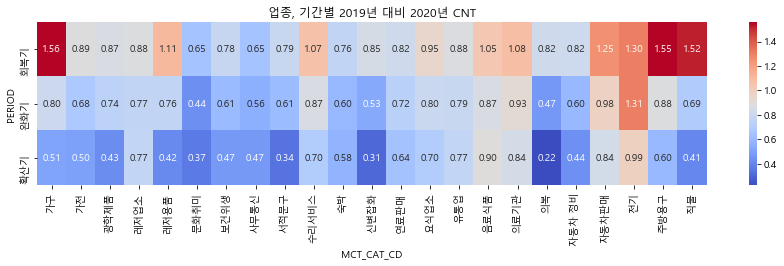

In [8]:
plt.figure(figsize=(15, 3))
ax = sns.heatmap(card_cat_cnt_ratio[['회복기', '완화기', '확산기']].T, annot=True, fmt=".2f", cmap='coolwarm')
ax.set_title("업종, 기간별 2019년 대비 2020년 CNT", size=12)
plt.show()

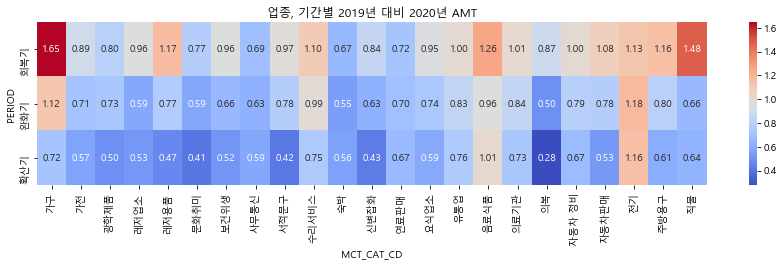

In [9]:
plt.figure(figsize=(15, 3))
ax = sns.heatmap(card_cat_amt_ratio[['회복기', '완화기', '확산기']].T, annot=True, fmt=".2f", cmap='coolwarm')
ax.set_title("업종, 기간별 2019년 대비 2020년 AMT", size=12)
plt.show()

## 송장건수 시기별

In [10]:
cj = pd.read_excel("../data/original_data/raw_data/05_물류데이터(CJ올리브네트웍스)/2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx")

In [11]:
cj['DL_YMD'] = pd.to_datetime(cj['DL_YMD'], format='%y%m%d')
cj['YEAR'] = cj.DL_YMD.dt.year
cj['GU'] = cj['CTPV_NM'].apply(lambda x:x[:2]) + " " + cj['CTGG_NM']

cj['PERIOD'] = cj['DL_YMD'].map(split_period)
cj = cj.query('PERIOD != "F"')

### 구별 송장건수

In [12]:
cj_gu_invc = groupby_ratio(cj, 'GU', 'INVC_CONT', 'DL_YMD', 'YEAR', 'PERIOD')

GU별 2019년 대비 2020년 INVC_CONT


PERIOD,확산기,완화기,회복기
GU,,,
대구 수성구,1.534534,1.438908,1.350524
대구 중구,1.170139,1.170614,1.207579
서울 노원구,1.245783,1.315737,1.250120
서울 중구,1.135614,1.121558,1.176599


### 품목별 송장건수

In [13]:
cj_cat_invc = groupby_ratio(cj, 'DL_GD_LCLS_NM', 'INVC_CONT', 'DL_YMD', 'YEAR', 'PERIOD')

DL_GD_LCLS_NM별 2019년 대비 2020년 INVC_CONT


PERIOD,확산기,완화기,회복기
DL_GD_LCLS_NM,,,
가구/인테리어,1.009906,1.373603,1.433773
도서/음반,1.241782,1.468934,1.328116
디지털/가전,1.075777,1.340267,1.327721
생활건강,1.582776,1.437545,1.402275
스포츠/레저,0.945222,1.326573,1.295191
식품,1.864510,1.492998,1.360787
출산/육아,1.014314,1.082773,1.082267
패션의류,0.927638,1.109835,1.152711
패션잡화,0.899146,1.076622,1.142792


## 유동인구 시기별

In [14]:
# load data
flow_201902 = pd.read_csv("../data/original_data/raw_data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201902.csv", sep='|')
flow_201903 = pd.read_csv("../data/original_data/raw_data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201903.csv", sep='|')
flow_201904 = pd.read_csv("../data/original_data/raw_data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201904.csv", sep='|')
flow_201905 = pd.read_csv("../data/original_data/raw_data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_201905.csv", sep='|')
flow_202002 = pd.read_csv("../data/original_data/raw_data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202002.csv", sep='|')
flow_202003 = pd.read_csv("../data/original_data/raw_data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202003.csv", sep='|')
flow_202004 = pd.read_csv("../data/original_data/raw_data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202004.csv", sep='|')
flow_202005 = pd.read_csv("../data/original_data/raw_data/01_유동인구데이터(SK텔레콤)/4개지역_FLOW_AGE_202005.csv", sep='|')
flow = pd.concat([flow_201902, flow_201903, flow_201904, flow_201905, flow_202002, flow_202003, flow_202004, flow_202005], axis=0)

# melt
flow = pd.melt(flow, id_vars=['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM'], value_vars=flow.columns[4:].tolist())
flow.rename(columns={"value":"FLOW"}, inplace=True)

# 성별 추출 + 연령 추출
sex_dict = {"MAN":"M", "WMAN":"F"}
flow['SEX_CD'] = flow['variable'].apply(lambda x:sex_dict[x.split('_')[0]])
flow['AGE_CD'] = flow['variable'].apply(lambda x:x.split('_')[-1][:4])

# 날짜처리
flow['STD_YMD'] = pd.to_datetime(flow.STD_YMD, format='%Y%m%d')
flow['YEAR'] = flow.STD_YMD.dt.year
flow['PERIOD'] = flow['STD_YMD'].map(split_period)

In [15]:
dong_to_gu = {}
for gu, dong in card[['GU_CD', 'DONG_CD']].values:
    if dong not in dong_to_gu:
        dong_to_gu[dong] = gu
        
flow['GU'] = flow['HDONG_NM'].apply(lambda x:dong_to_gu[x])

### 구별 유동인구

In [16]:
_ = groupby_ratio(flow, 'GU', 'FLOW', 'STD_YM', 'YEAR', 'PERIOD')

GU별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
GU,,,
대구 수성구,0.658555,0.764852,0.879453
대구 중구,0.501018,0.698507,0.849227
서울 노원구,0.742028,0.839564,0.918613
서울 중구,0.594718,0.645286,0.734527


### 연령별 유동인구

In [17]:
_ = groupby_ratio(flow, 'AGE_CD', 'FLOW', 'STD_YM', 'YEAR', 'PERIOD')

AGE_CD별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
AGE_CD,,,
0004,0.006736,0.047005,0.202563
0509,0.449149,0.539669,0.629307
1014,0.588605,0.641388,0.687459
1519,0.416154,0.496350,0.542834
2024,0.497735,0.590012,0.669769
2529,0.640918,0.741597,0.836515
3034,0.648848,0.747138,0.856589
3539,0.638814,0.717996,0.818228
4044,0.674420,0.763559,0.866725


### 성별 유동인구

In [18]:
_ = groupby_ratio(flow, 'SEX_CD', 'FLOW', 'STD_YM', 'YEAR', 'PERIOD')

SEX_CD별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
SEX_CD,,,
F,0.608704,0.702629,0.800524
M,0.666688,0.769065,0.873167


## 생활인구 시기별

In [19]:
flow_living = pd.read_csv("../data/external_data/processed_data/local_people_data.csv")

In [20]:
# melt
flow_living = pd.melt( flow_living, 
                               id_vars=['STD_DD', '시간대구분', 'G_DNG_NM'], 
                               value_vars=['남자_0009세생활인구수', '남자_1014세생활인구수', '남자_1519세생활인구수', 
                                           '남자_2024세생활인구수', '남자_2529세생활인구수', '남자_3034세생활인구수',
                                           '남자_3539세생활인구수', '남자_4044세생활인구수', '남자_4549세생활인구수', 
                                           '남자_5054세생활인구수', '남자_5559세생활인구수', '남자_6064세생활인구수', 
                                           '남자_6569세생활인구수', '남자_70세이상생활인구수',
                                           '여자_0009세생활인구수', '여자_1014세생활인구수', '여자_1519세생활인구수', 
                                           '여자_2024세생활인구수', '여자_2529세생활인구수', '여자_3034세생활인구수', 
                                           '여자_3539세생활인구수', '여자_4044세생활인구수', '여자_4549세생활인구수', 
                                           '여자_5054세생활인구수', '여자_5559세생활인구수', '여자_6064세생활인구수',
                                           '여자_6569세생활인구수', '여자_70세이상생활인구수'])
flow_living.rename(columns={"value":"FLOW"}, inplace=True)

# 성별 추출 + 연령 추출
sex_dict = {"남자":"M", "여자":"F"}
flow_living['SEX_CD'] = flow_living['variable'].apply(lambda x:sex_dict[x.split('_')[0]])
flow_living['AGE_CD'] = flow_living['variable'].apply(lambda x:(x.split('_')[-1][:4]))
flow_living['AGE_CD'] = flow_living['AGE_CD'].replace('70세이', '70U')

# 날짜처리
flow_living['STD_DD'] = pd.to_datetime(flow_living.STD_DD, format='%Y-%m-%d')
flow_living['YEAR'] = flow_living.STD_DD.dt.year

In [21]:
def time_split(time):
    if 9<= time and time <=18:
        return "낮"
    elif 0<=time and time<=6:
        return "밤"
    else:
        return 'F' # 그 외 시간은 고려하지 않음

In [22]:
flow_living['GU'] = flow_living['G_DNG_NM'].apply(lambda x:" ".join(x.split()[:2]))
flow_living['PERIOD'] = flow_living['STD_DD'].map(split_period)
flow_living['TIME'] = flow_living['시간대구분'].map(time_split)

In [23]:
flow_living = flow_living.query('(TIME != "F") and (PERIOD != "F")')

### 구별 생활인구

In [24]:
living_gu_flow = groupby_ratio(flow_living.query('TIME=="낮"'), 'GU', 'FLOW', 'STD_DD', 'YEAR', 'PERIOD')
living_gu_flow = groupby_ratio(flow_living.query('TIME=="밤"'), 'GU', 'FLOW', 'STD_DD', 'YEAR', 'PERIOD')

GU별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
GU,,,
서울 노원구,1.038418,1.021281,1.052301
서울 중구,0.806406,0.792920,0.847895


GU별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
GU,,,
서울 노원구,1.033763,1.022778,1.054796
서울 중구,0.921597,0.916346,0.943488


### 연령별 생활인구

In [25]:
living_age_flow = groupby_ratio(flow_living.query('TIME=="낮"'), 'AGE_CD', 'FLOW', 'STD_DD', 'YEAR', 'PERIOD')
living_age_flow = groupby_ratio(flow_living.query('TIME=="밤"'), 'AGE_CD', 'FLOW', 'STD_DD', 'YEAR', 'PERIOD')

AGE_CD별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
AGE_CD,,,
0009,0.968772,0.944650,0.984566
1014,0.987703,0.967445,1.029119
1519,0.892679,0.855608,0.896299
2024,0.871087,0.860607,0.895493
2529,0.918368,0.894667,0.925186
3034,0.930183,0.913884,0.940157
3539,0.947221,0.925884,0.968249
4044,0.958233,0.933425,0.971305
4549,0.963323,0.948085,0.990684


AGE_CD별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
AGE_CD,,,
0009,1.045913,1.021770,1.073124
1014,1.045913,1.024534,1.085908
1519,1.016229,0.991297,1.029522
2024,0.959354,0.971028,1.012911
2529,0.983539,0.981604,1.007831
3034,1.001024,0.998203,1.017571
3539,1.008301,1.005120,1.032730
4044,1.019057,1.002930,1.031996
4549,1.018340,1.010881,1.038899


### 성별 생활인구

In [26]:
_ = groupby_ratio(flow_living.query('TIME=="낮"'), 'SEX_CD', 'FLOW', 'STD_DD', 'YEAR', 'PERIOD')
_ = groupby_ratio(flow_living.query('TIME=="밤"'), 'SEX_CD', 'FLOW', 'STD_DD', 'YEAR', 'PERIOD')

SEX_CD별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
SEX_CD,,,
F,0.922580,0.908313,0.945667
M,0.946306,0.930457,0.971775


SEX_CD별 2019년 대비 2020년 FLOW


PERIOD,확산기,완화기,회복기
SEX_CD,,,
F,1.003373,0.994567,1.024437
M,1.008437,0.998003,1.028825
